# Lab 3 Hopfield NN

### Imports and general function

In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

# 3.1
def generate_data_31(noise = "none"):
    """
    Generate data with varying noise for task 3.1
    :param string type: amount of noise "none", "small", "large", "all" (all permutations returned)
    :return: P x N array where P is the number of data points, and N is the data dimensionality
    """
    if noise == "none":
        x1 = np.array([-1, -1, 1, -1, 1, -1, -1, 1])
        x2 = np.array([-1, -1, -1, -1, -1, 1, -1, -1])
        x3 = np.array([-1, 1, 1, -1, -1, 1, -1, 1])
        return np.vstack([x1, x2, x3])
    elif noise == "small":
        x1 = np.array([1, -1, 1, -1, 1, -1, -1, 1])
        x2 = np.array([1, 1, -1, -1, -1, 1, -1, 1])
        x3 = np.array([1, 1, 1, -1, 1, 1, -1, 1])
        return np.vstack([x1, x2, x3])
    elif noise == "large":
        x1 = np.array([-1, -1, 1, -1, 1, -1, -1, 1])
        x2 = np.array([-1, -1, -1, -1, -1, 1, -1, -1])
        x3 = np.array([-1, 1, 1, -1, -1, 1, -1, 1])
        X = np.vstack([x1, x2, x3])
        for n in range(3):
            index = np.arange(x1.shape[0])
            np.random.shuffle(index)
            for i in range(int(x1.shape[0] / 2 + 1)):
                X[n, index[i]] *= -1
        return X
    elif noise == "all":
        all_permutations = list(itertools.product([-1, 1], repeat=8))
        return np.array(all_permutations)
    
    
def hopfield(X):
    """
    Train a hopfield NN on data X using little model approach
    :param matrix X: P x N array containing P data points of dimensionality N
    :return: Weight matrix N x N 
    """
    P = X.shape[0]
    N = X.shape[1]
    W = np.zeros([N, N])
    W = np.dot(X.T, X)
    return W


def recall(x, W):
    """
    Find attractor for data x
    :param vector x: data point x
    :param matrix W: N x N matrix W
    :return: attractor for x, number of iters after which attractor was found
    """
    max_iter = 100
    iters = 0
    x_new = np.zeros(x.shape[0])
    for i in range(max_iter):
        iters += 1
        x_new = np.dot(W, x)
        x_new = np.where(x_new < 0, -1, 1)
        if np.array_equal(x, x_new):
            return x, iters
        x = x_new
    return x, max_iter


# 3.6
def generate_data_36(P, N, rho = 0.1):
    """
    Generate P sparse patterns with dimensionality N and activity rho
    :param int P: Number of data points
    :param int N: Data dimensionality
    :param float rho: Percentage of dimensions != 0 for each sample
    :return: P x N matrix containing generated data
    """
    X = np.zeros((P, N))
    for p in range(P):
        x = np.zeros(N)
        for i in range(int(rho*N)):
            x[i] = 1
        np.random.shuffle(x)
        X[p, :] = x
    return X


def hopfield_imbalanced(X):
    """
    Train a hopfield NN on data X using little model approach, adjusted for imbalanced data
    :param matrix X: P x N array containing P data points of dimensionality N
    :return: Weight matrix N x N 
    """
    P = X.shape[0]
    N = np.maximum(X.shape[1], 1)
    rho = (1/(N*P))*np.sum(X)
    W = np.zeros([N, N])
    W = np.dot(X.T-rho, X-rho)
    return W


def recall_imbalanced(x, W, theta):
    """
    Find attractor for data x with added bias theta
    :param vector x: data point x
    :param matrix W: N x N matrix W
    :param float theta: bias term
    :return: attractor for x, number of iters after which attractor was found
    """
    max_iter = 100
    iters = 0
    x_new = np.zeros(x.shape[0])
    for i in range(max_iter):
        iters += 1
        x_new = 0.5 + 0.5 * np.where((np.dot(W, x) - theta) < 0, -1, 1)
        if np.array_equal(x, x_new):
            return x, iters
        x = x_new
    return x, max_iter

### Task 3.1 Little Model

In [18]:
# Pre-task, check successfull storage of data
X = generate_data_31("none")
W = hopfield(X)
for x in X:
    x_recall, iters = recall(x, W)
    print(f"Stored: {x}")
    print(f"Recall: {x_recall} after {iters} iterations")
    print("")

Stored: [-1 -1  1 -1  1 -1 -1  1]
Recall: [-1 -1  1 -1  1 -1 -1  1] after 1 iterations

Stored: [-1 -1 -1 -1 -1  1 -1 -1]
Recall: [-1 -1 -1 -1 -1  1 -1 -1] after 1 iterations

Stored: [-1  1  1 -1 -1  1 -1  1]
Recall: [-1  1  1 -1 -1  1 -1  1] after 1 iterations



In [19]:
# Recall distorted patterns
X_distorted = generate_data_31(noise="small")
for i, d in enumerate(X_distorted):
    x_recall, iters = recall(d, W)
    for j, x in enumerate(X):
        if np.array_equal(x, x_recall):
            print(f"Distorted pattern d{i}: {d} converged to stored pattern x{j}: {x} after {iters} iterations")
            break
        elif j == X.shape[0] - 1:
            print(f"Distorted pattern d{i}: {d} did not converge to stored pattern")
    

Distorted pattern d0: [ 1 -1  1 -1  1 -1 -1  1] converged to stored pattern x0: [-1 -1  1 -1  1 -1 -1  1] after 2 iterations
Distorted pattern d1: [ 1  1 -1 -1 -1  1 -1  1] converged to stored pattern x2: [-1  1  1 -1 -1  1 -1  1] after 2 iterations
Distorted pattern d2: [ 1  1  1 -1  1  1 -1  1] converged to stored pattern x2: [-1  1  1 -1 -1  1 -1  1] after 3 iterations


In [20]:
# Find attractors
X_all = generate_data_31(noise="all")
attractors = []
for a in X_all:
    x_recall, _ = recall(a, W)
    attractors.append(x_recall)
attractors = np.unique(attractors, axis=0)
print(f"There are {attractors.shape[0]} attractors in the network")
print(attractors)

There are 14 attractors in the network
[[-1 -1 -1 -1 -1  1 -1 -1]
 [-1 -1 -1 -1  1 -1 -1 -1]
 [-1 -1  1 -1 -1  1 -1  1]
 [-1 -1  1 -1  1 -1 -1  1]
 [-1 -1  1 -1  1  1 -1  1]
 [-1  1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1]
 [-1  1  1 -1  1 -1 -1  1]
 [ 1 -1 -1  1  1 -1  1 -1]
 [ 1  1 -1  1 -1  1  1 -1]
 [ 1  1 -1  1  1 -1  1 -1]
 [ 1  1 -1  1  1  1  1 -1]
 [ 1  1  1  1 -1  1  1  1]
 [ 1  1  1  1  1 -1  1  1]]


In [21]:
# Very distorted patterns
X_very_distorted = generate_data_31(noise="large")
for i, d in enumerate(X_very_distorted):
    x_recall, iters = recall(d, W)
    for j, x in enumerate(X):
        if np.array_equal(x, x_recall):
            print(f"Distorted pattern d{i}: {d} converged to stored pattern x{j}: {x} after {iters} iterations")
            print("")
            break
        elif j == X.shape[0] - 1:
            print(f"Distorted pattern d{i}: {d} did not converge to stored pattern")
            print(f"d{i}: {d} converged to attractor: {x_recall} after {iters} iterations")
            print("")
    

Distorted pattern d0: [ 1  1 -1 -1  1  1 -1 -1] did not converge to stored pattern
d0: [ 1  1 -1 -1  1  1 -1 -1] converged to attractor: [ 1  1 -1  1 -1  1  1 -1] after 2 iterations

Distorted pattern d1: [-1  1  1  1 -1 -1 -1  1] converged to stored pattern x2: [-1  1  1 -1 -1  1 -1  1] after 3 iterations

Distorted pattern d2: [-1 -1 -1  1 -1 -1  1  1] did not converge to stored pattern
d2: [-1 -1 -1  1 -1 -1  1  1] converged to attractor: [ 1 -1 -1  1  1 -1  1 -1] after 2 iterations



In [25]:
# Expected convergence
print(np.log(np.size(W)))

4.1588830833596715


### 3.6 Sparse Patterns, Data Imbalance and Bias
* How they affect storage capacity

Storage capacity for sparse data ρ=0.1
Network size: N=100 with expected capacity M≈13.8, or M≈460.51701859880916 for sparse data


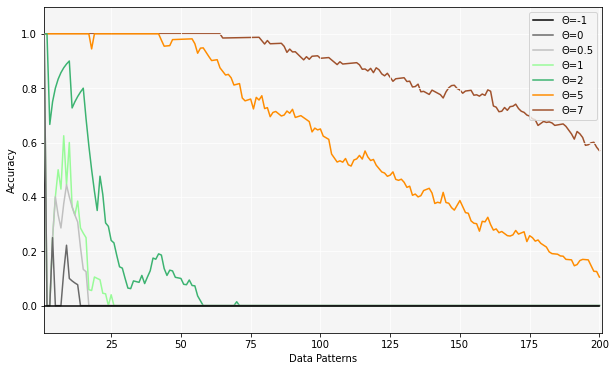

In [6]:
# rho = 0.1
# Vary bias
P = 200
N = 100
print(f"Storage capacity for sparse data ρ={0.1}")
print(f"Network size: N={N} with expected capacity M≈{0.138*N}, or M≈{N*np.log(N)} for sparse data")
X = generate_data_36(P, N, rho=0.1)
thetas = [-1, 0, 0.5, 1, 2, 5, 7]
# Check how many patterns can accuretly be stored by network accuracies P x theta
accuracies = []
for p in range(P):
    W = hopfield_imbalanced(X[:p+1,:])
    accuracy = []
    for t in thetas:
        acc = 0
        for x in X[:p+1,:]:
            x_recall, iters = recall_imbalanced(x, W, t)
            if np.array_equal(x_recall, x):
                acc += 1
        accuracy.append(acc/(p+1))
    accuracies.append(accuracy)
accuracies = np.array(accuracies)
# Plot accuracies
plt.figure()
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.grid(c="white", zorder=0)
plt.plot(range(1, P+1), accuracies[:, 0], c="black", label=f"Θ={thetas[0]}", zorder=7)
plt.plot(range(1, P+1), accuracies[:, 1], c="dimgray", label=f"Θ={thetas[1]}", zorder=6)
plt.plot(range(1, P+1), accuracies[:, 2], c="silver", label=f"Θ={thetas[2]}", zorder=5)
plt.plot(range(1, P+1), accuracies[:,3], c="palegreen", label=f"Θ={thetas[3]}", zorder=4)
plt.plot(range(1, P+1), accuracies[:,4], c="mediumseagreen", label=f"Θ={thetas[4]}", zorder=3)
plt.plot(range(1, P+1), accuracies[:,5], c="darkorange", label=f"Θ={thetas[5]}", zorder=2)
plt.plot(range(1, P+1), accuracies[:,6], c="sienna", label=f"Θ={thetas[6]}", zorder=1)
plt.xlim(1, P+1)
plt.ylim(-0.1,1.1)
plt.xlabel("Data Patterns")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Storage capacity for sparse data ρ=0.05
Network size: N=100 with expected capacity M≈13.8, or M≈460.51701859880916 for sparse data


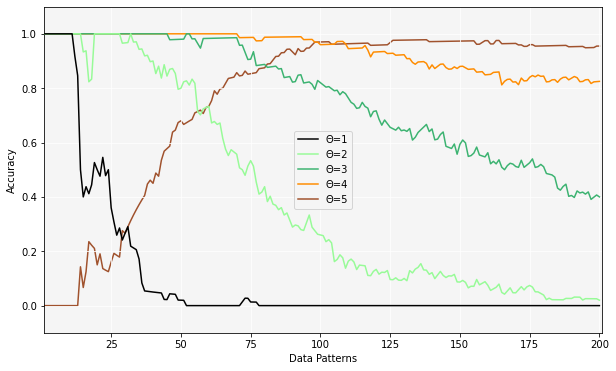

In [17]:
# rho = 0.05
# Vary bias
P = 200
N = 100
print(f"Storage capacity for sparse data ρ={0.05}")
print(f"Network size: N={N} with expected capacity M≈{0.138*N}, or M≈{N*np.log(N)} for sparse data")
X = generate_data_36(P, N, rho=0.05)
thetas = [1, 2, 3, 4, 5]
# Check how many patterns can accuretly be stored by network accuracies P x theta
accuracies = []
for p in range(P):
    W = hopfield_imbalanced(X[:p+1,:])
    accuracy = []
    for t in thetas:
        acc = 0
        for x in X[:p+1,:]:
            x_recall, iters = recall_imbalanced(x, W, t)
            if np.array_equal(x_recall, x):
                acc += 1
        accuracy.append(acc/(p+1))
    accuracies.append(accuracy)
accuracies = np.array(accuracies)
# Plot accuracies
plt.figure()
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.grid(c="white", zorder=0)
plt.plot(range(1, P+1), accuracies[:, 0], c="black", label=f"Θ={thetas[0]}", zorder=7)
plt.plot(range(1, P+1), accuracies[:,1], c="palegreen", label=f"Θ={thetas[1]}", zorder=4)
plt.plot(range(1, P+1), accuracies[:,2], c="mediumseagreen", label=f"Θ={thetas[2]}", zorder=3)
plt.plot(range(1, P+1), accuracies[:,3], c="darkorange", label=f"Θ={thetas[3]}", zorder=2)
plt.plot(range(1, P+1), accuracies[:,4], c="sienna", label=f"Θ={thetas[4]}", zorder=1)
plt.xlim(1, P+1)
plt.ylim(-0.1,1.1)
plt.xlabel("Data Patterns")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Storage capacity for sparse data ρ=0.05
Network size: N=100 with expected capacity M≈13.8, or M≈460.51701859880916 for sparse data


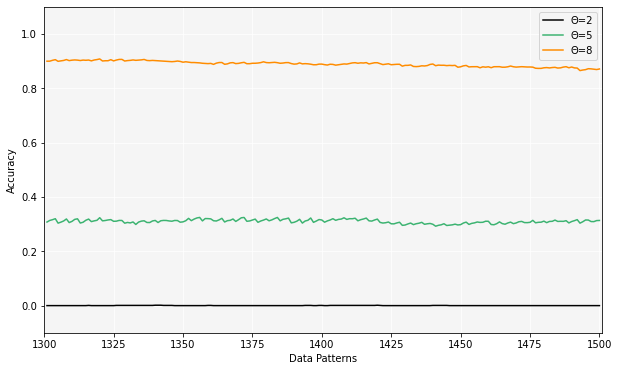

In [14]:
# rho = 0.05
# Vary bias
P = 1500
R = 200
N = 100
print(f"Storage capacity for sparse data ρ={0.05}")
print(f"Network size: N={N} with expected capacity M≈{0.138*N}, or M≈{N*np.log(N)} for sparse data")
X = generate_data_36(P, N, rho=0.05)
thetas = [2, 5, 8]
# Check how many patterns can accuretly be stored by network accuracies P x theta
accuracies = []
for p in range(P-R, P):
    W = hopfield_imbalanced(X[:p+1,:])
    accuracy = []
    for t in thetas:
        acc = 0
        for x in X[:p+1,:]:
            x_recall, iters = recall_imbalanced(x, W, t)
            if np.array_equal(x_recall, x):
                acc += 1
        accuracy.append(acc/(p+1))
    accuracies.append(accuracy)
accuracies = np.array(accuracies)
# Plot accuracies
plt.figure()
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.grid(c="white", zorder=0)
plt.plot(range(P-R+1, P+1), accuracies[:, 0], c="black", label=f"Θ={thetas[0]}", zorder=7)
plt.plot(range(P-R+1, P+1), accuracies[:,1], c="mediumseagreen", label=f"Θ={thetas[1]}", zorder=3)
plt.plot(range(P-R+1, P+1), accuracies[:,2], c="darkorange", label=f"Θ={thetas[2]}", zorder=2)
plt.xlim(P-R, P+1)
plt.ylim(-0.1,1.1)
plt.xlabel("Data Patterns")
plt.ylabel("Accuracy")
plt.legend()
plt.show()